In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


with open("tot_nreads.txt", "r") as f:
    tot_reads=int(f.read())
dedup_reads=[]
for file in ["nreads_ds2.txt","nreads_ds1.txt","nreads.txt"]:
    with open(file, "r") as f:
        dedup_reads.append(int(f.read()))

dedup05=dedup_reads[1]
dedup03=dedup_reads[0]
dedup1=dedup_reads[2]
nb_reads_out=np.array([dedup03,dedup05,dedup1])
saturation_level=np.array([0.3,0.5,1])
tot_reads=tot_reads*saturation_level
S1=(1-nb_reads_out/tot_reads)[0]
S2=(1-nb_reads_out/tot_reads)[1]
S3=(1-nb_reads_out/tot_reads)[2]
R1=tot_reads[0]
R2=tot_reads[1]
R3=tot_reads[2]

Text(0, 0.5, 'Saturation (%)')

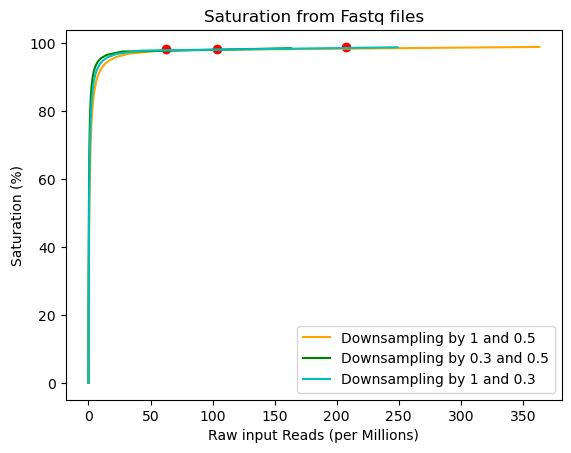

In [24]:
from sympy import Matrix, solve_linear_system
from sympy.abc import x, y
#First Curve
system = Matrix(( (R3, -S3, R3*S3), (R2, -S2, R2*S2)))
output=solve_linear_system(system, x, y)
Vmax=float(output[x])
Km=float(output[y])
S_1=np.linspace(0,Vmax-2e-3,101)
R_1=S_1*Km/(Vmax-S_1)
#2nd curve
system = Matrix(( (R1, -S1, R1*S1), (R2, -S2, R2*S2)))
output=solve_linear_system(system, x, y)
Vmax=float(output[x])
Km=float(output[y])
S_2=np.linspace(0,Vmax-2e-3,101)
R_2=S_2*Km/(Vmax-S_2)
#3rd Curve
system = Matrix(( (R3, -S3, R3*S3), (R1, -S1, R1*S1)))
output=solve_linear_system(system, x, y)
Vmax=float(output[x])
Km=float(output[y])
S_3=np.linspace(0,Vmax-2e-3,101)
R_3=S_3*Km/(Vmax-S_3)
plt.plot(R_1/1e6,S_1*100,c='orange',label='Downsampling by 1 and 0.5')
plt.plot(R_2/1e6,S_2*100,c='g',label='Downsampling by 0.3 and 0.5')
plt.plot(R_3/1e6,S_3*100,c='c',label='Downsampling by 1 and 0.3')
plt.scatter(tot_reads/1e6,(1-nb_reads_out/tot_reads)*100,c='r')
plt.legend()
plt.title("Saturation from Fastq files")
plt.xlabel('Raw input Reads (per Millions)')
plt.ylabel('Saturation (%)')

In [25]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
h5d="/gpfs/commons/home/ecordina/uST/github/slide_snake/out/decoderseq/STARsolo/short_read/decoderseq/Solo.out/GeneFull/raw/matrix.h5ad"
h5d05="/gpfs/commons/home/ecordina/uST/github/slide_snake/out/decoderseq05/STARsolo/short_read/decoderseq/Solo.out/GeneFull/raw/matrix.h5ad"
h5d03="/gpfs/commons/home/ecordina/uST/github/slide_snake/out/decoderseq03/STARsolo/short_read/decoderseq/Solo.out/GeneFull/raw/matrix.h5ad"
barcodes=pd.read_csv("/gpfs/commons/home/ecordina/decoderseq/data/GSM7585158/output/GSM7585158_MOB-15-1.bc.intissue.txt",index_col=0,header=None,sep='\t')
slide_snake=sc.read_h5ad(h5d)
slide_snake03=sc.read_h5ad(h5d03)
slide_snake05=sc.read_h5ad(h5d05)
slide_snake.obs.index=[barcode[0]+barcode[1] for barcode in slide_snake.obs.index.str.split("_")]

nb_reads_out=np.array([np.sum(slide_snake03.X.toarray()),np.sum(slide_snake05.X.toarray()),np.sum(slide_snake.X.toarray())])
saturation_level=np.array([0.3,0.5,1])
fastq_reads=599404932/4 #zcat SRR25213401_1.fastq.gz | wc -l
tot_reads=fastq_reads*saturation_level
S1=(1-nb_reads_out/tot_reads)[0]
S2=(1-nb_reads_out/tot_reads)[1]
S3=(1-nb_reads_out/tot_reads)[2]
R1=tot_reads[0]
R2=tot_reads[1]
R3=tot_reads[2]


/gpfs/commons/home/ecordina/.conda/envs/deconvolution/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/commons/home/ecordina/.conda/envs/deconvolution/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/commons/home/ecordina/.conda/envs/deconvolution/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Text(0, 0.5, 'Saturation (%)')

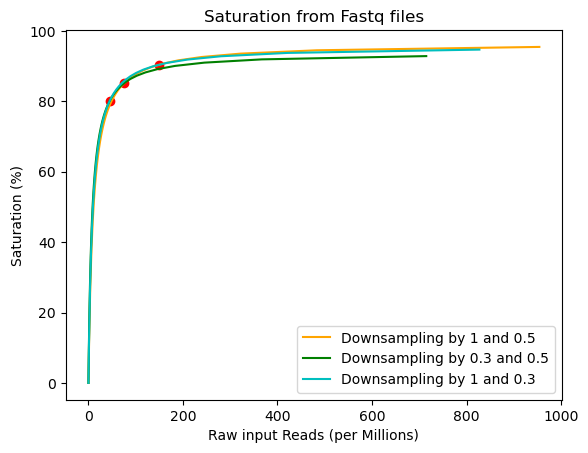

In [26]:
from sympy import Matrix, solve_linear_system
from sympy.abc import x, y
#First Curve
system = Matrix(( (R3, -S3, R3*S3), (R2, -S2, R2*S2)))
output=solve_linear_system(system, x, y)
Vmax=float(output[x])
Km=float(output[y])
S_1=np.linspace(0,Vmax-0.01,101)
R_1=S_1*Km/(Vmax-S_1)
#2nd curve
system = Matrix(( (R1, -S1, R1*S1), (R2, -S2, R2*S2)))
output=solve_linear_system(system, x, y)
Vmax=float(output[x])
Km=float(output[y])
S_2=np.linspace(0,Vmax-0.01,101)
R_2=S_2*Km/(Vmax-S_2)
#3rd Curve
system = Matrix(( (R3, -S3, R3*S3), (R1, -S1, R1*S1)))
output=solve_linear_system(system, x, y)
Vmax=float(output[x])
Km=float(output[y])
S_3=np.linspace(0,Vmax-0.01,101)
R_3=S_3*Km/(Vmax-S_3)
plt.plot(R_1/1e6,S_1*100,c='orange',label='Downsampling by 1 and 0.5')
plt.plot(R_2/1e6,S_2*100,c='g',label='Downsampling by 0.3 and 0.5')
plt.plot(R_3/1e6,S_3*100,c='c',label='Downsampling by 1 and 0.3')
plt.scatter(tot_reads/1e6,(1-nb_reads_out/tot_reads)*100,c='r')
plt.legend()
plt.title("Saturation from Fastq files")
plt.xlabel('Raw input Reads (per Millions)')
plt.ylabel('Saturation (%)')